In [1]:
using LinearAlgebra, Plots, LaTeXStrings
include("LAcodes.jl")
using PyCall
itikz=pyimport("itikz")
jinja=pyimport("jinja2")

PyObject <module 'jinja2' from '/home/user/.local/lib/python3.8/site-packages/jinja2/__init__.py'>

<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Vector Spaces</strong>
</div>

# 1. Linear Combinations of Vectors, Vector Spaces

## 1.1 Motivation

There are many mathematical objects that obey the rules of linear combinations:

**Example:** Functions  $$f(x) = 5 + 3 \sin x + 2 \cos x$$

is a linear combination of the functions $f_1(x) = 1, f_2(x) = \ x, f_3(x) = \cos x$:

$$f(x) = 5 f_1(x) + 3 f_2(x) + 2 f_3(x).$$

> We will generalize the notion of vector to any such objects!
> 
> The basic ingredients are
> * a set of **vectors**
> * scalars (we will use $\mathbb{R}$, though most of our examples use $\mathbb{Q})$.
> * addition and scalar multiplication operations.

## 1.2 Definition

### 1.2.1 Definition of a Vector Space

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **vector space** consists of
* a set of vectors $V$
* a set of scalars $\mathbb{R}$
* an addition operation $+ : V \times V \longrightarrow V$
* a scalar multiplication operation  $\cdot : \mathbb{R} \times V \longrightarrow V$
</div>

<div style="background-color:#F2F5A9;color:black;">
For any vectors $u, v$ and $w$ in V, and any scalars $\alpha, \beta$ in $\mathbb{R}$,
the following axioms hold:

1. $u+v = v+u$
2. $u+(v+w) = (u+v)+w$
3. $\exists\ 0 \in V$ such that $u + 0 = u$
4. $\exists\ \tilde{u} \in V$ such that $u + \tilde{u} = 0$
    
5. $\alpha ( u + v ) = \alpha u +\alpha v$
6. $( \alpha + \beta) u = (\alpha u) + (\beta u)$
7. $\alpha ( \beta u ) = ( \alpha \beta ) u$
8. $1 u = u$
</div>

**Remark:** When the scalars and the operations are known from the context, it is customary to refer to the vector space by its set of vectors: $V$.

----
<div style="background-color:#F2F5A9;color:black;">

**Theorem:**
* The 0 vector is unique.<br>
  For any vector $v \in V$, $\color{red}{\text{the zero vector} \quad 0} = 0\ v$
* The additive inverse $\tilde{u}$ is unique.<br>
  For any vector $v \in V$, $\quad \tilde{v} = -1 v$
</div>

**Remarks:**
* The additive inverse $\quad \tilde{v} = -1 v  \quad$ will be written $\quad -v$.
* The linear combination $\; u + (-1 v) \quad$ will be written $\quad u - v$
* Equality between vectors has the properties
    * $u = v \Leftrightarrow u+w = v+w$
    * $u = v \Leftrightarrow \alpha u = \alpha v, \alpha \ne 0$

**The algebra of linear combinations works similarly to scalar algebra**.

### 1.2.2 Example of a Computation

Let $u, v$ and $x$ be vectors in a vector space $V$
$$
\begin{align}
    (\xi) & \Leftrightarrow 3 x + 2 u - v = 5 x - u + v & \quad &\\
          & \Leftrightarrow 3 x - 5 x = -2 u + v - u + v & \quad & \text{ using the properties of equality and vector addition}\\
          & \Leftrightarrow -2 x = - 3 u + 2 v           & \quad & \text{ using Axioms 1,2 and 6}\\
          & \Leftrightarrow x = \frac{3}{2} u - v          & \quad & \text{ using the properties of equality and scalar multiplication}
\end{align}
$$

**Remark:** We have *not* specified what the "vectors" are in this computation. We only said they were vectors in a  vector space!

## 1.3 Examples and Further Definitions and Theorems

### 1.3.1 Vectors in $\mathbb{R}^N$

> The vectors in $\mathbb{R}^N$ satisfy all of the axioms of a vector space,<br>
and therefore **$\mathbb{R}^N$ is a vector space.**

#### 1.3.1.1 The Vector Space $V = \{ 0 \}$

The zero vector in any vector space satisfies all of the axioms of a vector space.

In particular, $V = \left\{ \; \begin{pmatrix}0\\0\\0 \end{pmatrix}\; \right\}$,
i.e., **the set of vectors consisting of just the origin in $\mathbb{R}^3$
is a vector space.**

**Remark:** $V \subset \mathbb{R}^3$:  this is a vector space that is contained in a vector space!

#### 1.3.1.2 Vectors in a Span of Vectors in $\mathbb{R}^3$ 

Let $v_1 = \begin{pmatrix} 3 & -1 & 1 \end{pmatrix}$ and $v_2 = \begin{pmatrix} 1 & -1 & 1 \end{pmatrix}$ be two vectors in $\mathbb{R}^3$.

**The plane $P = span \{ v_1, v_2 \}$ through the origin satisfies all of the axioms of a vector space.**

Use the definition of a span to rewrite
$$
P = \left\{ v \ \bigg| \ v = \alpha v_1 + \beta v_2 \text{ for any } \alpha, \beta \text{ in } \mathbb{R}    \right\}
$$
The reader is encouraged to check each of the properties of addition, scalar multiplication, and each of the axioms of a vector space.

> It turns out that the most important properties are
> * **For any two vectors $v_1, v_2$ in $V$, their sum $v_1 + v_2$ is in $V$:**<br>
Take any two vectors in the plane, and note that their sum is a vector in the plane.
> * **For any vector $v$ in $V$, and any scalar $\alpha$ in $\mathbb{R}$, the scalar product $\alpha v$ is in $V$.**<br>
Take any vector in the plane and multiply it by some scalar: the resultant vector is in the plane.

**Remark:** We can rephrase this as **any linear combination of vectors in $V$ is a vector in $V.$**<br>No matter which vectors we pick in $V$, and what linear combinations of these vectors we form, we cannot escape from $V$!

**Remark:** The <font style="color:blue;">plane</font> $P$ in this example is a vector space contained in $\mathbb{R}^3$.<br>
<font style="color:blue;">Any one vector in this plane, e.g., the zero vector, has *three entries!*</font>

### 1.3.2 Closed under Addition, Closed under Scalar Multiplication, Spans

<div style="background-color:#F2F5A9;color:black;">

**Definition:** Let $S$ be a set of vectors in a vector space.<br>
* $S$ is **closed under addition** iff the sum of any two vectors $s_1, s_2$ in $S$ is also in $S$.
* $S$ is **closed under scalar multiplication** iff the scalar product of any vectors $s$ in $S$ with any scalar is also in $S$.
</div>

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $S = \left\{ s_1, s_2, \dots s_k \right\}$ be a set of vectors in a vector space $V$.<br>
The $span\left\{ S \right\}$ is a vector space contained in $V$
</div>

This definition and theorem apply to any vector space, not just $\mathbb{R}^N$.

### 1.3.3 Vector Spaces of Matrices

#### 1.3.3.1 The Set of Matrices of the Same Size

Let $\mathscr{M}_{2,3} = \left\{ A  \ \bigg| \  A \text{ is a matrix of size } 2 \times 3 \right\}$

This set is closed under addition and scalar multiplication. All of the axioms of a vector space hold:<br> **$\mathscr{M}_{2,3}$ is a vector space.**

#### 1.3.3.2 A Subset of a Set of Matrices of the Same Size 

Let $S = \left\{ A  \ \bigg| \ A \text{  is an upper triangular matrix of size } 3 \times 3 \right\} \subset \mathscr{M}_{3,3}$.

We can again check closure under addition and scalar multiplication, and all the axioms:<br>
**$S$ is a vector space contained in the vector space $\mathscr{M}_{3,3}.$**

### 1.3.4 Vector Spaces of Functions

#### 1.3.4.1 The Vector Space of Functions $\mathscr{F}(-\infty,\infty)$

**The set of functions
$\mathscr{F}(-\infty,\infty) = \left\{ f(x)  \ \bigg| \  f : \mathbb{R} \longrightarrow  \mathbb{R} \right\}$
is a vector space.**

Think of vectors $v$ in $\mathbb{R}^N$ as functions from the index $i = 1, 2, \dots N$ to the corresponding entry $v_i$.<br>
A function generalizes this notion: it is a vector with indices $x \in \mathbb{R}$ that maps
an index $x$ to a corresponding value $f(x)$.

Vector f = [10, 5, 2, 1, 2, 10, 17]


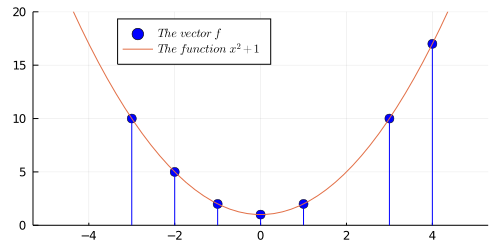

In [4]:
x = [-3,-2,-1,0,1,3,4]
f = x.^2 .+ 1
println("Vector f = $f")
scatter( x, f, line=:stem, marker=:circle, color=:blue, markersize=5, label = L"The\ vector\ f", legend=:top)

x=range(-5,stop=5, length=50)
plot!( x, x.^2 .+ 1, label=L"The\ function\ x^2+1" )
plot!(size=(500,250), ylims=(0,20))

#### 1.3.4.2 The set of Polynomials $\mathscr{P}_2[-1,1]$

Consider the set of polynomials of degree less than or equal to 2, with $-1 \le x \le 1$
$$
\begin{align}
\mathscr{P}_2[-1,1] & = \left\{ p(x) \ \bigg| \  p(x) = \alpha + \beta x + \gamma x^2, 
\quad\text{for any } \alpha,\beta,\gamma \text{ in } \mathbb{R} \right\} \\
& = span \left\{\ p_1(x) = 1, p_2(x) = x, p_3(x) = x^2 \ \right\}
\end{align}
$$

This is **a vector space contained in the vector space of functions $\mathscr{F}[-1,1]$.**

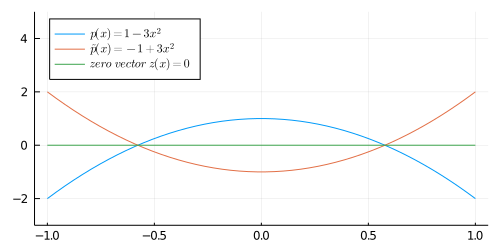

In [5]:
x = range(-1, stop=1, length=50)
plot( x, 1 .- 3x.^2, label = L"p(x) = 1 - 3 x^2", legend=:topleft)
plot!( x, -1 .+ 3x.^2, label = L"\tilde{p}(x) = -1 + 3 x^2")
plot!( x, 0*x, label=L"zero\ vector\ z(x) = 0" )
plot!(size=(500,250), ylims=(-3,5))

**Remark:** Note the zero vector! It is a function $z(x)$.<br>$\quad$ To get it, take any function, e.g., $f(x) = x$, and multiply it by zero: $z(x) = 0$, the x axis of our plot!

### 1.3.5 Set Notation

The set notation used in the examples looks as follows:
$$
\color{red}{\text{< Name of the set >}} = \left\{
\color{magenta}{\text{<vector>}}  \ \bigg| \  \color{green}{\text{< membership constraint(s) >}}
 \right\}
$$

For example,
$$\color{red}{S} = \left\{
\color{magenta}{\begin{pmatrix} x \\ y \end{pmatrix}}
\;  \ \bigg| \  \quad \color{green}{-1 < x < 1, \text{and } y \ge 0}
\right\} \subset \mathbb{R}^2
$$

defines a set named $S$, consisting of vectors $\begin{pmatrix} x\\y \end{pmatrix}$ (actual vectors in $\mathbb{R}^2$).<br>The vectors belong to the set $S$ iff the membership constraints $-1 < x < 1$ and $y \ge 0$ are satisfied.


# 2. Subspaces of a Vector Space

## 2.1. Definition, Subspace Test

As we have seen, vector spaces can contain vector spaces. This motivates the following
<div style="background-color:#F2F5A9;color:black;">

**Definition:** Let $V$ be a vector space. A set of vectors $S$ is a **subspace** of $V$ iff
* $S \subseteq V$
* $S$ is not empty, i.e. $S \ne \emptyset$
* $S$ is a vector space with the same scalars, vector addition and scalar multiplication as $V$.
<div>

**Remark:** A set is empty if it contains no element. The set $\left\{ 0 \right\}$ is *not empty*: it contains the zero vector.

You may have noticed that checking whether a set $S$ is a subset of a vector space $V$
does not require checking all the axioms: most of them are inherited from $V$!

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $V$ be a vector space. $S$ is a **subspace** of $V$ iff
1. $S$ is not empty
2. $S$ is closed under vector addition
3. $S$ is closed under scalar multiplication
</div>

**Remark:** Since vector spaces must contain the zero vector,
it is often advantageous to check for property 1. of a subspace by verifying that
**the zero vector is in the set** $S$, i.e.,
we replace property 1. in the above definition with
<div style="background-color:#F2F5A9;color:black;">

1. The zero vector $0 \in S$.
</div>

---
**Remarks:**
* Checking whether a set $S$ is a subspace of $V$ requires checking that each of the properties 1., 2. and 3. holds.<br> If any one of these fails, $S$ is not a subspace.
* We start with the conjecture that $S$ is a subspace.
    * examples that show that the sum of two example vectors in $S$ is also in $S$ is not sufficient: one would have to verify all possible combinations of all possible vectors.<br>No "Proof" by example!
    * a counter example that shows our conjecture is false hovever disproves the conjecture:<br>This is **proof by contradiction**

<div style="background-color:#F2F5A9;color:black;">

> **Template of a proof:** substitute the appropriate text for < ... >
> 
> *Step 1:* Identify the $\color{magenta}{\text{< vectors >}}$,
> and the $\color{green}{\text{< membership constraint(s) >}}.$<br>
> Identify the zero vector $< \color{magenta}{z} >$.
> 
> *Step 2:* Check each of the properties 1, 2 and 3 in any order (If you notice a counterexample > for any one of these,you are done!)
> 
> 1. The zero vector is $< \color{magenta}{z} >$.<br>
> $< \color{magenta}{z} >$ <is/is not> in $S$ since it <does/does not> satisfy the $\color{green}{\text{< membership constraint(s) >}}.$
> 2. Let $< \color{magenta}{s_1} > \text{ be any vector in } S \Rightarrow \color{green}{\text{< membership constraint(s) >}} \text{ holds for < } \color{magenta}{s_1} >$.<br>
> Let $< \color{magenta}{s_2} > \text{ be any vector in } S \Rightarrow \color{green}{\text{< membership constraint(s) >}} \text{ holds for } < \color{magenta}{s_2} >$.<br>
> Does $< \color{magenta}{s_1 + s_2} >$ satisfy the $\color{green}{\text{< membership constraint(s) >}}?$
> 2. Let $< \color{magenta}{s_1} > \text{ be any vector in } S \Rightarrow \color{green}{\text{< membership constraint(s) >}} \text{ holds for } < \color{magenta}{s_1} >$.<br>
> Let $< \color{magenta}{\alpha_1} > \text{ be any scalar}$.<br>
> Does $< \color{magenta}{\alpha\ s_1} >$ satisfy the $\color{green}{\text{< membership constraint(s) >}}?$
</div>
<div style="background-color:#F2F5A9;color:black;">

> **Shortcut:**
> **If the definition of $S$ can be rewritten as a span, $S$ is a subspace!**

</div>

## 2.2 Examples

### 2.2.1 Vectors in $\mathbb{R}^N$

#### 2.2.1.1 A Span of Vectors

Let $S = \left\{ w  \ \bigg| \  w=\begin{pmatrix} s+t \\ s-t \\2 s + 3 t \end{pmatrix}
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\}$

Notice that the membership constraint can be rewritten as a linear combination. We have
$$
\begin{align}
S & = \left\{ w  \ \bigg| \  w=\begin{pmatrix} s+t \\ s-t \\2 s + 3 t \end{pmatrix}
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\} \\
& =
\left\{ w  \ \bigg| \  w =
s \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix} +
t \begin{pmatrix}\ 1 \\ -1 \\ \ 3 \end{pmatrix}
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\} \\
& =span \left\{\ \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix}, \begin{pmatrix}\ 1 \\ -1 \\ \ 3 \end{pmatrix}\ 
\right\}
\end{align},
$$
thus **$S$ is a subspace of $\mathbb{R}^3$**.

#### 2.2.1.2 A Set of Vectors that Do Not Contain the Zero Vector 

Let $S = \left\{ w  \ \bigg| \  w=\begin{pmatrix} s+t+1 \\ s-t \\2 s + 3 t \end{pmatrix}
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\}$

This is almost the same problem as before.
$$
\begin{align}
S & = \left\{ w  \ \bigg| \  w=\begin{pmatrix} s+t\color{red}{+1} \\ s-t \\2 s + 3 t \end{pmatrix}
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\} \\
& =
\left\{ w  \ \bigg| \  w =
s \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix} +
t \begin{pmatrix}\ 1 \\ -1 \\ \ 3 \end{pmatrix} +
\color{red}{ \begin{pmatrix}\ 1 \\ \ 0 \\ \ 0 \end{pmatrix} }
\ \text{ for any } s, t \text{ in } \mathbb{R} \ \right\} \\
\end{align}
$$

this is not a span. Let's try our template:

1. The zero vector is $\begin{pmatrix} 0 \\ 0\\0 \end{pmatrix}$.<br>
To check whether the zero vector is in $S$,we need to check whether there are values of $\alpha,\beta$ such that
$$
s \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix} +
t \begin{pmatrix}\ 1 \\ -1 \\ \ 3 \end{pmatrix} +
\begin{pmatrix}\ 1 \\ 0 \\ \ 0 \end{pmatrix}  = \begin{pmatrix} 0 \\ 0\\0 \end{pmatrix}
\quad \Leftrightarrow \quad
\begin{pmatrix} 1 & \ 1 \\ 1 & -1 \\ 2 & \ 3 \end{pmatrix}
\begin{pmatrix} s \\ t \end{pmatrix} = \begin{pmatrix} -1 \\ 0\\0 \end{pmatrix}
$$
Since this problem has no solution, the zero vector is not in $S$.<br>
Therefore, **$S$ is not a subspace of $\mathbb{R}^3$.**

#### 2.2.1.3 A Set of Vectors that is Not a Span (i.e., Hyperplane)

<p style="color:blue;font-size:15;height:15">Sets of Vectors that are Not Subspaces</p>
<img src="Figs/subspace.svg"
     alt="Sets of Vectors that are Not Subspaces"
     style="float: left; margin-right: 10px;" width=250/>
Consider
$$
\begin{align}
S_1 &= \left\{ \begin{pmatrix} x\\y \end{pmatrix}  \ \bigg| \ x y \ge 0 \right\}\quad \text{and}\\
S_2 &= \left\{ \begin{pmatrix} x\\y \end{pmatrix}  \ \bigg| \ y \ge 0 \right\}\\
\end{align}
$$
The figure to the left shows these two sets: $S_1$ consists of quadrant 1 and 3, including the axes, while $S_2$ consists of the upper half plane including the x axis. Since neither of these are (hyper)planes, we suspect these are not subspaces.

##### First, let us consider $S_1$.

1. The zero vector $\begin{pmatrix} x\\y \end{pmatrix} = \begin{pmatrix} 0\\0 \end{pmatrix}$
   is in $S_1$ since $x y = 0$, satisfying the membership constraints:<br> $S_1$ **is not empty**.

3. Let $\begin{pmatrix}x_1\\y_1\end{pmatrix} \in S_1 \Rightarrow x_1 y_1 \ge 0$,  and let $\alpha_1$ be any scalar.<br>
Consider $\begin{pmatrix}\alpha_1 x_1 \\ \alpha_1 y_1 \end{pmatrix}$. Since $\alpha_1 x_1 \alpha_1 y_1 = \alpha_1^2 x_1 y_1$, and since we know $x_1 y_1 \ge 0$, the membership criterion is satisfied: this vector is in $S_1$, and therefore<br> $S_1$ **is closed under scalar multiplication**.

2. Let $\begin{pmatrix}x_1\\y_1\end{pmatrix} \in S_1 \Rightarrow x_1 y_1 \ge 0$,
and let $\begin{pmatrix}x_2\\y_2\end{pmatrix} \in S_1 \Rightarrow x_2 y_2 \ge 0$.<br>
Consider $\begin{pmatrix} x_1+x_2 \\ y_1+y_2 \end{pmatrix}$. Checking the membership criterion yields the expression
$(x_1+x_2)(y_1+y_2) = x_1 y_1 + x_2 y_2 + x_1 y_2 + y_2 x_1$.<br> The first two terms are non-negative, but the cross terms could be either.

> Can we construct a counterexample?<br>
$\quad\;\ $We could construct one simply by looking at the righthand side of this expression.<br>
$\quad\;\ $This is made even simpler by looing at the figure:<br>
$\qquad\qquad$look at the vectors $v_1, v_2$, and notice that their sum is in quadrant 4, not in $S_1$.

$\quad\;\ $$S_1$ is not closed under addition:<br>
$\quad\;\ $Let $v_1 = \begin{pmatrix} 2\\1 \end{pmatrix}$ and $v_2 = \begin{pmatrix} -1\\-2 \end{pmatrix}$ for example. Both of these vectors satisfy the membership constraint,<br>
$\quad\;\ $and are therefore in $S_1$.

$\quad\;\ $ $v_1 + v_2 = \begin{pmatrix}1\\-1\end{pmatrix}$ however does not satisfy the membership constraint.<br>
$\quad\;\ $ **Since $S_1$ is not closed under addition, it is not a subspace of $\mathbb{R}^2$.**

##### $S_2$ is similar.

This time, it is condition 3 (closure under scalar multiplication) that is violated.

**Counterexample:**<br>
$\qquad$Let $u_1 = \begin{pmatrix}0\\1 \end{pmatrix}.$ It is in $S_2$ since it satisfies the membership constraint. The vector $-u_1 = \begin{pmatrix}0\\ -1 \ \end{pmatrix}$ is not in $S_2.$<br>
$\qquad$**Since $S_2$ is not closed under scalar multiplication, it is not a subspace of $\mathbb{R}^2$.**

#### 2.2.1.4 Another Set of Vectors that is Not a Hyperplane

<img src="Figs/ellipse.svg"Figs/
     style="float: left; margin-right: 10px;" width=250/>

Consider $S = \left\{ \begin{pmatrix} x\\y \end{pmatrix} \ \bigg| \ \left(\frac{x}{4}\right)^2 + \left(\frac{y}{2}\right)^2 \le 1 \right\}$

This is the interior and boundary of an ellipse (Reminder: intermediate value theorem.)

Note that Property 3. does not hold:<br>
$\quad$ Let $v = \begin{pmatrix} 2\\0\end{pmatrix}$. The vector $v$ is in $S$ since $\left(\frac{2}{4}\right)^2 + 0 < 1$.<br>
$\quad$ The vector $5 v = \begin{pmatrix} 10\\0\end{pmatrix}$ is not in $S$since $\left(\frac{10}{4}\right)^2 + 0 > 1$.

Since $S$ is not closed under scalar multiplication, **$S$ is not a subspace of $\mathbb{R}^2$.**

### 2.2.2 Matrices

#### 2.2.2.1 Invertible Matrices

Consider the set $M = \left\{ A \in \mathscr{M}_{2 2}  \ \bigg| \  A^{-1} \text{ exists} \right\}$

1. The zero vector is $Z = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}$.<br>
Since $Z^{-1}$ does not exist, the zero vector is not in $M$.<br>
**Since the zero vector is not in $M$, this set of vectors $M$ is not a subspace of $\mathscr{M}_{2 2}$**

### 2.2.3 Functions

#### 2.2.3.1 The subspace $\mathscr{C}^2(-1,1)$

Consider the space of functions $\mathscr{C}^2(-1,1) = \left\{ f(x)  \ \bigg| \  \frac{d^2}{dx^2} f(x)\quad\text{is continuous for } -1 < x < 1 \right\}$.

1. The zero vector $z(x) = 0$ is in this subset since $z''(x) = 0$ is continuous on  the interval $(-1,1)$.<br> **$\mathscr{C}^2(-1,1)$  is not empty.**

2. Let $f_1(x) \in \mathscr{C}^2(-1,1) \Rightarrow f_1'' \text{ is continuous on } (-1,1)$<br>
Let $f_2(x) \in \mathscr{C}^2(-1,1) \Rightarrow f_2'' \text{ is continuous on } (-1,1)$<br>
Since $(f_1+f_2)'' = f_1''+f_2''$ is continuous on $ (-1,1)$,<br> **$\mathscr{C}^2(-1,1)$ is closed under addition.**

3. Let $f_1(x) \in \mathscr{C}^2(-1,1) \Rightarrow f_1'' \text{ is continuous on } (-1,1)$<br>
Let $\alpha_1$ be any scalar in $\mathbb{R}$.<br>
Since $(\alpha_1 f_1)'' = \alpha_1 f_1''$ is continuous on $(-1,1)$,<br>
 **$\mathscr{C}^2(-1,1)$ is closed under scalar multiplication.**
 

**Since 1,2, and 3 hold, $\mathscr{C}^2(-1,1)$ is a subspace of $\mathscr{F}(-1,1)$.**

#### 2.2.3.2 A Set of Functions that is Not a Subspace

Consider $S = \left\{ f(x)\ \bigg| \ f(x) = \alpha + 2 x + \beta x^2 \quad \text{for all }\alpha, \beta \text{ in } \mathbb{R}, -\infty < x < \infty\right\}$

The vectors are functions $f(x)$ defined on the domain $-\infty < x < \infty$.

1. The zero vector $z(x) = 0$. To check whether it is in $S$, we need to find constants $\alpha$ and $\beta$ such that $z(x) = \alpha + 2x + \beta x^2$ for all $-\infty < x < \infty$.<p><br>
    $$\begin{align}
    (\xi) \Leftrightarrow &\ \alpha + 2x + \beta x^2 & = 0 & \quad\text{for all } -\infty < x < \infty \\
          \Rightarrow &\ \alpha & = 0 & \quad\text{at } x=0\\
    (\xi) \Rightarrow &\ \alpha + 2 + \beta &= 0 & \quad\text{at } x = 1\\
    (\xi) \Rightarrow &\ \alpha - 2 + \beta &= 0 & \quad\text{at } x = -1\\
    \end{align}
    $$
    Since the three equations for $\alpha$ and $\beta$ result in a contradiction,
    the zero vector is not in $S$.<br>
    **$S$ is not a subspace of $\mathscr{F}(-\infty,\infty)$**.
    </p>


# 3. Take Away

> Checking whether a set of vectors $S$ in a vector space $V$ forms a subspace of $V$:
> * try to write it as a span
> * check whether the zero vector is in $S$.
> * check whether there is an easy counterexample
> * write out a proof using the template provided above